# Twitch Gamers Social Network Analysis
This dataset represents a social network of Twitch users-gamers collected via the public Twitch API in Spring 2018. Each node corresponds to an individual user, and edges denote mutual follower relationships between user pairs. The resulting graph constitutes a single connected component.

The dataset can be found in the [stanford datasets](https://snap.stanford.edu/data/twitch_gamers.html). We decided to focus on the portuguese speakers dataset.

In [1]:
from utils import *

G = nx.read_edgelist("data/musae_PTBR_edges.csv", delimiter=",", nodetype=int, comments="f")
G, df = load_twitch_user_attributes(G)

We also know some extra attributes of the users:

- days: The age of the user’s account, measured in days since creation at the time the data was collected.
- mature: A boolean flag indicating whether the user’s channel is marked as containing mature or adult-oriented content.
- views: The total number of views the user’s Twitch channel has received.
- partner: Indicates whether the user is a Twitch Partner, a verified status given to established streamers with significant viewership 

Now we can visualize the graph to get a better understanding:

In [ ]:
visualize_static_entire_graph(G, node_size= 25)

Now we can do an interactive visualization that also shows the attributes for each node. Also we keep the nodes of k_core 3 to showcase the more important nodes:

In [ ]:
generic_show(G, node_color='blue', node_size=20, node_tooltip=["id", "account_age_days", "total_views", "is_partner", "is_mature"], k_core=3)


Next, the graph summary statistics:

In [ ]:
summary_stats(G)

#### Insights
The Portuguese Twitch dataset shows a graph that is fairly large but also very well connected. Even though there are almost two thousand users, the network is fully connected, meaning everyone is reachable through others (no isolated component) which makes sense since gamers usually play and watch multiple games. On average, each user is connected to about 33 others, which helps explain why the average distance between any two people is only about 2-3 hops. The diameter of 7 and radius of 4 also suggest that no one is ever too far from anyone else. Even though the overall density is low, as is normal for social networks, the clustering coefficient is pretty high, meaning friends of a user are often friends with each other (holding the triadic closure). Overall, it looks like a close-knit community where information and interactions can spread quite fast.


### Attribute exploration
Next we can explore the attributes associated with each node to find some interesting insights:

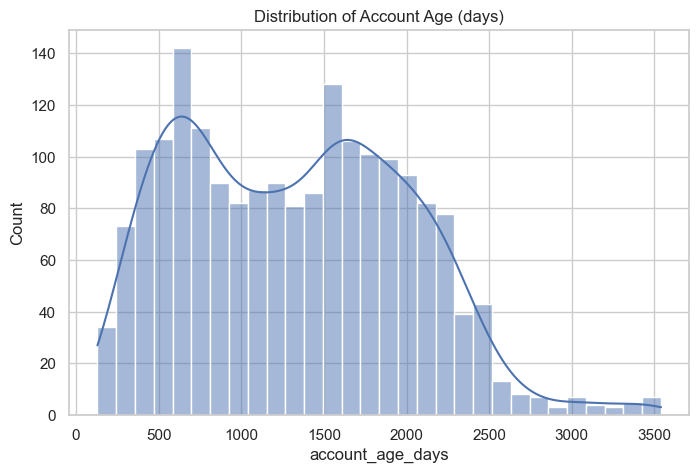

The distribution of account age shows a broad spread with two noticeable peaks around ~600 and ~1600 days, indicating both a large group of relatively new users and a substantial cluster of long-standing accounts, while very old accounts (3000+ days) are rare.

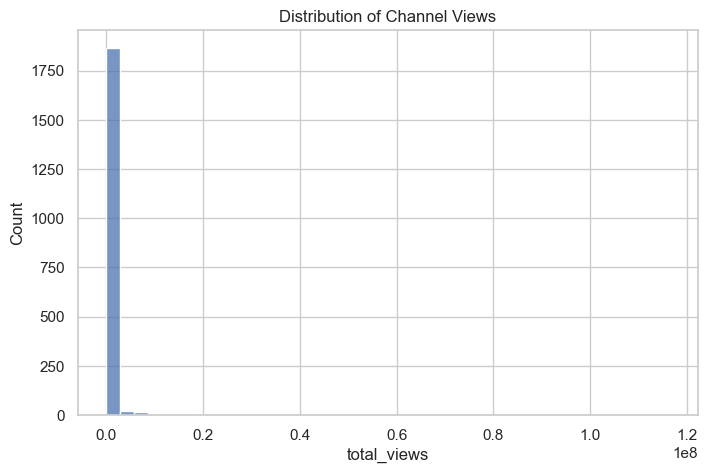

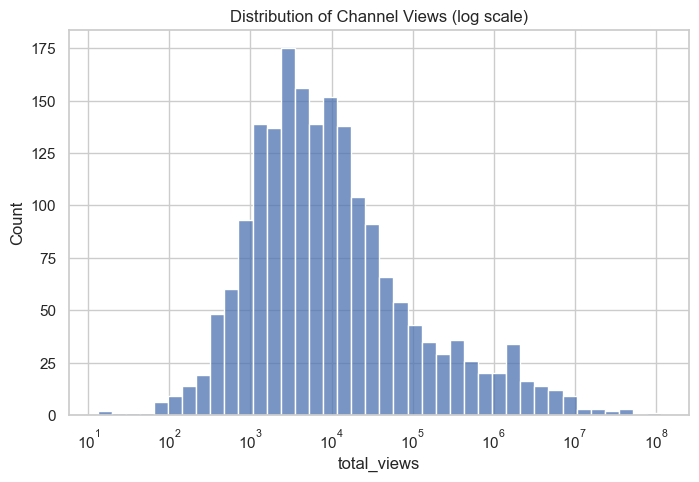

The distribution of channel views is heavily right-skewed, with most streamers clustered between 1,000 and100,000 views while a small number of outliers reach into the millions, highlighting a strong popularity imbalanceon the platform.

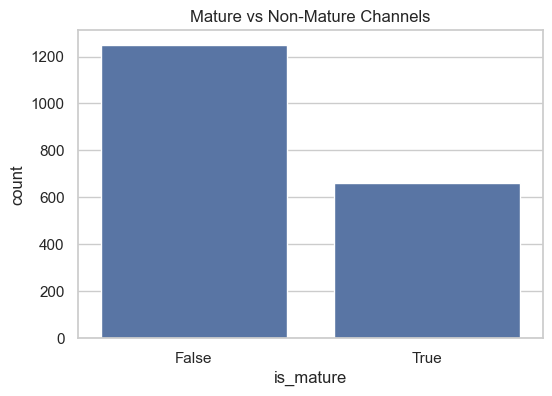

Percentage of mature indicated channels: 34.57%


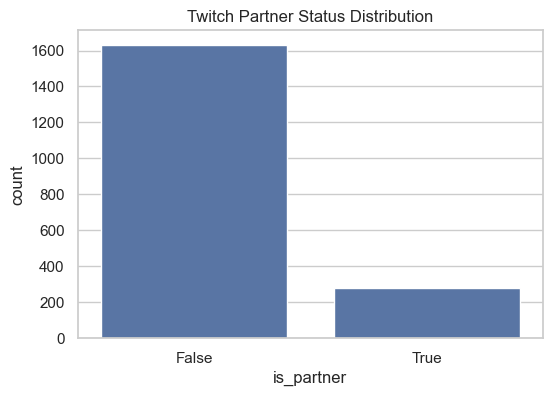

Percentage of Twitch Partners: 14.59%


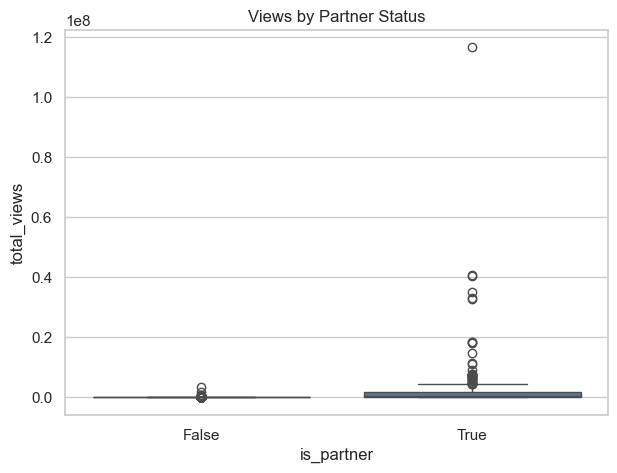

Partnered streamers have dramatically higher view counts than non-partners,with most of the extreme outliers concentrated in the partner group, highlighting astrong divide in visibility and reach between the groups.

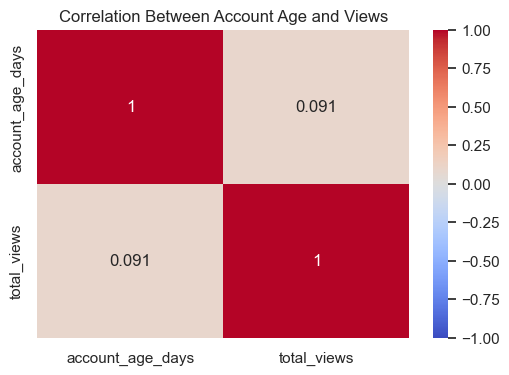

There is only a very weak positive correlation between account age and total views,suggesting that simply having an older Twitch account does not correspond to how many views achannel gets.

Summary statistics:
      account_age_days total_views
count             1912        1912
mean              1327      408715
std                685     3454463
min                129           0
25%                716        2015
50%               1316        6706
75%               1854       31372
max               3541   116392808 

Average views by partner status:
is_partner
False      19124
True     2689010
Name: total_views, dtype: object 

Average account age by mature flag:
is_mature
False    1338
True     1308
Name: account_age_days, dtype: object 

Top 10 most viewed accounts:
        id total_views account_age_days is_partner is_mature
1488   290   116392808             1896          1         0
945   1320    40659090             2490          1         0
601    103    40456102             2454          1         0
315   1739    35175114             1781          1         0
1443  1660    33101623             2024          1         0
1410   127    32672093             1592  

c:\Users\stef4\Desktop\Massive Graph\community_detection\utils.py:295: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(df[['account_age_days', 'total_views']].describe().applymap(lambda x: f"{x:.0f}"), "\n")
c:\Users\stef4\Desktop\Massive Graph\community_detection\utils.py:306: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: f"{x:.0f}" if isinstance(x, (int, float)) else x), "\n")
c:\Users\stef4\Desktop\Massive Graph\community_detection\utils.py:310: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: f"{x:.0f}" if isinstance(x, (int, float)) else x), "\n")


In [ ]:
twitch_user_exploratory_analysis(df)

### Centralities Analysis
#### Degree Centrality

In [ ]:
visualize_centrality(G=G, measure='degree')

The nodes with the highest degree centrality act as major players in the Twitch social media graph, connecting to a large portion of all other users and therefore playing a crucial role in holding the network together. These nodes are all <b> Twitch Partners </b> with extremely high view counts and long account histories, showing that visibility, popularity, and longevity strongly contribute to their central position in the network. Their high raw degrees, ranging from around 385 to 767 neighbors, indicate that they maintain an unusually large number of direct connections, giving them strong influence to the network especially when considering that the average degree is only around 32 neighbors. Interestingly, almost all of these highly connected nodes are non-mature channels, implying that potentially a lot of younger audiences are watching and supporting them.

#### Closeness Centrality

In [ ]:
visualize_centrality(G=G, measure='closeness')

The nodes with the highest closeness centrality sit at the core of the Twitch social network in terms of distance: on average, they are only a few steps away from all other users, meaning they can reach the rest of the network very efficiently along short paths. All of these top-10 nodes are Twitch Partners, and they tend to have both high total views and relatively old accounts, which suggests that well-established, popular streamers are not only highly connected but also geographically central in the graph’s structure. Several nodes (like 127, 1297, 467, 290, 1476, 1660, 1259) appear among the top for both degree and closeness, reinforcing the idea that these are key players that are both well connected and well positioned to quickly interact with or influence many others. Again the majority of nodes are non-mature channels.

#### Eigenvector

In [ ]:
visualize_centrality(G=G, measure='eigenvector')

The nodes with the highest eigenvector centrality form a tightly connected core of highly influential streamers whose importance comes not just from how many neighbors they have, but from being connected to other important nodes. This top-10 list almost perfectly overlaps with the top nodes from degree and closeness centrality, meaning these users are not only well-connected and centrally located but also embedded in a cluster of other high-status users, which increases their influence in the network according to eigenvector theory. All of these nodes are Twitch Partners with large view counts and long account ages, showing that established, popular channels tend to reinforce each other's influence by collaborating and making group contect many times. Nodes like 127, 1297, 467, 290, and 1476 all lie in a rich, mutually reinforcing subgraph of prominent streamers. Together, these users form an elite cluster whose connections make them structurally powerful and highly influential across the graph.

#### Betweeness Centrality

In [ ]:
visualize_centrality(G=G, measure='betweenness')

The nodes with the highest betweenness centrality function as key bridges in the Twitch social network, sitting on a large number of the shortest paths that connect different parts of the graph. These users act as intermediaries of the information flow between communities and thus information is more likely to pass through them, giving them a form of information spread power. Similar to the other centrality measures, the top betweenness nodes are all Twitch Partners with significant view counts and generally older accounts. Nodes like 127, 1476, 1297, and 290 consistently appear across all centrality rankings, reinforcing their role as major players in the network. A notable difference is the extra presence of a few mature-content channels (67, 287, 428), suggesting that while mature channels may not be the most popular, some still serve as important bridges between content clusters.


#### Centrality - User Attribute correlation

In [ ]:
compare_centralities_with_attributes(G)

- Degree, eigenvector, and betweenness centrality are strongly correlated (0.86–0.93), indicating that the most connected users also tend to be the most influential within the network’s core and serve as important bridges of the information flow.

- Closeness centrality is moderately correlated with degree and eigenvector centrality (0.61–0.77), suggesting that nodes with many connections or influential neighbors also tend to be situated relatively close, in terms of path distance, to the rest of the network.

- Total views show moderate correlation with degree and betweenness (~0.59–0.61), meaning popular streamers tend to be highly connected and sit on key pathways, but high popularity does not automatically guarantee a highly central structural position.

- Eigenvector centrality is the strongest single correlate of degree (0.93), reflecting how central players cluster together in the Twitch graph.

- Account age shows very weak correlation (0.05–0.15) with all centrality measures and with total views, implying that simply having an older account does not strongly determine structural importance or popularity.

- Partner status shows a moderate positive correlation degree and eigenvector centrality indicating that Twitch Partners tend to occupy more connected, influential positions in the network than non-partners.

### Community Detection